In [1]:
import warnings
import numpy as np 
import pandas as pd 
from math import sqrt
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('C:\\Users\\Okwua\\1-projects\\Phys_Descrip.txt')


In [3]:
df1=data.drop(['Config','Ecoh','Eb','Eadh'], axis=1)
df1.head(54)

N  infa_C_Au  infa_S_Mg  infa_S_O   cc  cs_Mg  cs_O  ave_GCN  csDist_Mg  \
0   1          1          1         0  0.0      1     0    1.972      2.855   
1   1          1          1         0  0.0      1     0    2.433      3.184   
2   1          1          1         0  0.0      1     0    2.895      3.542   
3   1          0          0         0  0.0      0     0    3.356      3.922   
4   1          0          0         0  0.0      0     0    3.817      4.317   
5   1          1          1         0  0.0      1     1    2.017      2.558   
6   1          1          1         0  0.0      1     0    2.470      2.920   
7   1          1          1         0  0.0      1     0    2.925      3.307   
8   1          0          0         0  0.0      0     0    3.382      3.711   
9   1          0          0         0  0.0      0     0    3.840      4.127   
10  1          1          2         0  0.0      2     2    2.061      2.593   
11  1          1          1         0  0.0      1     0    2.506      2.951   
12  1          1          1         0  0.0      1     0    2.956      3.334   
13  1          0          0         0  0.0      0     0    3.409      3.735   
14  1          0          0         0  0.0      0     0    3.864      4.149   
15  1          0          0         0  0.0      0     0    4.044      3.882   
16  1          1          2         1  0.0      2     2    2.492      2.262   
17  1          1          2         0  0.0      2     1    2.871      2.664   
18  1          1          2         0  0.0      0     0    3.271      3.084   
19  1          0          0         0  0.0      0     0    3.686      3.513   
20  1          0          0         0  0.0      0     0    4.110      3.950   
21  1          1          2         0  0.0      2     2    2.306      2.451   
22  1          1          2         0  0.0      2     0    2.711      2.827   
23  1          1          1         0  0.0      1     0    3.132      3.225   
24  1          0          0         0  0.0      0     0    3.562      3.638   
25  1          0          0         0  0.0      0     0    4.000      4.062   
26  1          1          4         1  0.0      4     1    2.597      1.966   
27  1          1          3         1  0.0      1     1    2.963      2.418   
28  1          0          0         0  0.0      0     0    3.352      2.874   
29  1          0          0         0  0.0      0     0    3.758      3.331   
30  1          0          0         0  0.0      0     0    4.175      3.789   
31  1          1          4         1  0.0      2     1    2.631      2.011   
32  1          1          2         0  0.0      2     1    2.993      2.455   
33  1          0          0         0  0.0      0     0    3.379      2.905   
34  1          0          0         0  0.0      0     0    3.781      3.357   
35  1          0          0         0  0.0      0     0    4.196      3.812   
36  1          1          2         0  0.0      2     1    2.776      2.562   
37  1          1          1         0  0.0      1     0    3.188      2.995   
38  1          0          0         0  0.0      0     0    3.612      3.436   
39  1          0          0         0  0.0      0     0    4.044      3.882   
40  1          1          2         1  0.0      2     2    2.187      2.339   
41  1          1          2         0  0.0      2     1    2.610      2.731   
42  1          1          1         0  0.0      1     0    3.045      3.141   
43  1          0          0         0  0.0      0     0    3.486      3.564   
44  1          0          0         0  0.0      0     0    3.932      3.995   
45  1          1          2         0  0.0      2     2    2.061      2.593   
46  1          1          1         0  0.0      1     0    2.506      2.951   
47  1          1          1         0  0.0      1     0    2.956      3.334   
48  1          0          0         0  0.0      0     0    3.409      3.735   
49  1          0          0         0  0.0      0     

In [4]:
(df1['N'].value_counts())

4     555
5     515
6     210
9     178
3     105
1     104
2     104
24     56
12     12
Name: N, dtype: int64

In [5]:
X=df1.iloc[:,:-1] ## independent features
y=df1.iloc[:,-1] ## dependent features

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
dtree=DecisionTreeRegressor(criterion="mse")

In [8]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [9]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9995810149628706


In [10]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.8582226502152005


In [11]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,X,y,cv=5)

In [12]:
score.mean()

-1.2515024904629288

In [13]:
import sys
import six
sys.modules['sklearn.externals.six']=six
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

In [14]:
features=list(X)
features

['N',
 'infa_C_Au',
 'infa_S_Mg',
 'infa_S_O',
 'cc',
 'cs_Mg',
 'cs_O',
 'ave_GCN',
 'csDist_Mg',
 'csDist_O',
 'Zdist']

In [15]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.369435 to fit



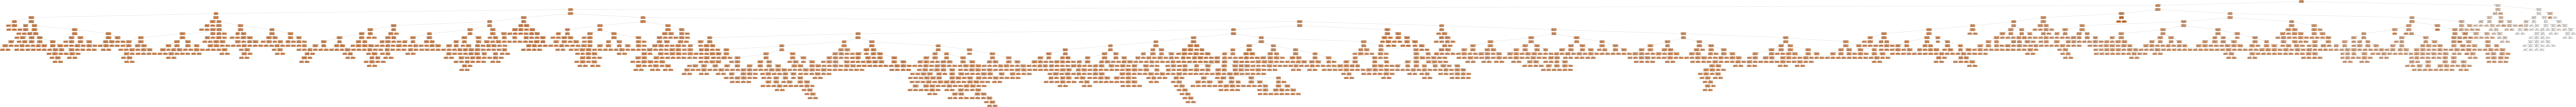

In [16]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

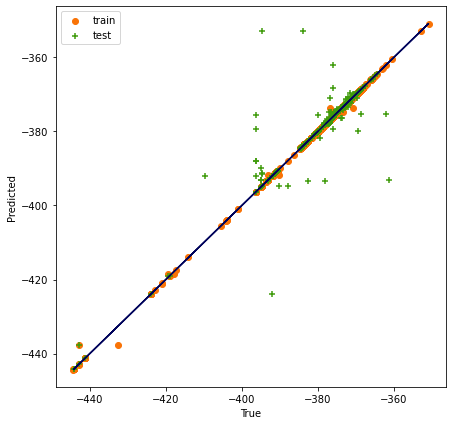

In [17]:
prediction_test=dtree.predict(X_test)
prediction_train=dtree.predict(X_train)

plt.figure(figsize=(7,7))
plt.scatter(y_train,prediction_train, marker='o', color='#f97306', label='train' )
plt.scatter(y_test,prediction_test, marker='+', color='#3f9b0b', label='test' )
plt.legend(loc='upper left')
plt.plot(y_train,y_train, color='#00035b')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

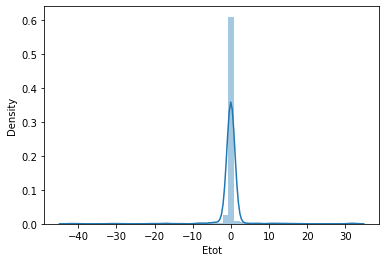

In [18]:
sns.distplot(y_test-prediction_test);

In [19]:
print('MAE:', str(round(metrics.mean_absolute_error(y_test, prediction_test),2)))
print('MSE:', str(round(metrics.mean_squared_error(y_test, prediction_test),2)))
print('RMSE:' + str(round(sqrt(metrics.mean_squared_error(y_test, prediction_test)),2)))
print('R_squared:'+ str(round(r2_score(y_test,prediction_test),2)))
print('Accuracy',100-(np.mean(np.abs((y_test-prediction_test)/y_test))*100))

MAE: 0.75
MSE: 12.93
RMSE:3.6
R_squared:0.86
Accuracy 99.80441046511307


In [20]:
Dt_Mae_1=(round(metrics.mean_absolute_error(y_test,prediction_test),2))
Dt_Mse_1=(round(metrics.mean_squared_error(y_test,prediction_test),2))
Dt_Rmse_1=(round(round(sqrt(metrics.mean_squared_error(y_test, prediction_test)),2)))
Dt_R_squared_1=(round(metrics.r2_score(y_test,prediction_test),2))
Dt_acc_1=(100-(np.mean(np.abs((y_test-prediction_test)/y_test))*100))

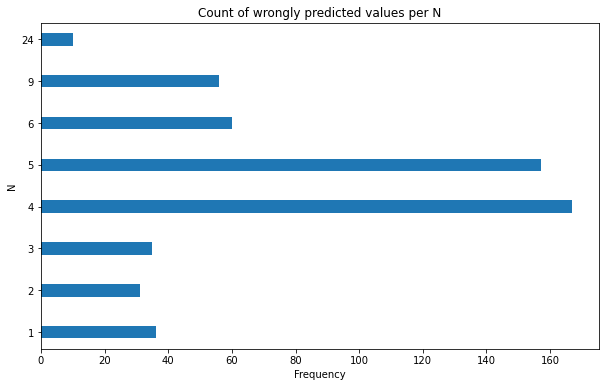

In [21]:
actual=pd.DataFrame(y_test)
predicted=pd.DataFrame(prediction_test,index=actual.index)
df_residuals = pd.concat([actual, predicted], axis=1)
df_residuals['Error']=abs(predicted[0]-actual['Etot'])

error=df_residuals.sort_values('Error')
#high_error=error.head(20)
index=error.index.tolist()


df_high_error=data.iloc[index]
df_high_error.drop(['Ecoh','Eb','Eadh'], axis=1,inplace=True)


df_high_error = df_high_error.join(df_residuals["Error"])
df_high_error = df_high_error.join(df_residuals[0])

# barplot of frequency of wrongly predicted values per N 
df_N=df_high_error.groupby('N').size()
plt.figure(figsize=(10,6))
df_N.plot.barh(x='N',width=0.3)
plt.title("Count of wrongly predicted values per N")
plt.ylabel('N')
plt.xlabel('Frequency');


### FEATURE SELECTION 

In [22]:
dtree.fit(X,y)

DecisionTreeRegressor()

In [23]:
print(dtree.feature_importances_)

[1.81710465e-01 7.05122092e-04 4.55261765e-04 5.58989073e-04
 6.56083105e-01 3.48296588e-03 5.04422577e-03 5.44678694e-02
 5.26150808e-02 3.56602642e-02 9.21665035e-03]


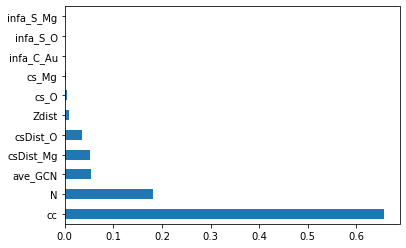

In [25]:
feat_importances = pd.Series(dtree.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [25]:
X2=X[['cs_O','Zdist','csDist_O','csDist_Mg','ave_GCN','N','cc','cs_O','cs_Mg']]

In [26]:
y

0      -367.335
1      -369.303
2      -369.386
3      -369.202
4      -368.988
         ...   
1834   -441.258
1835   -422.950
1836   -417.915
1837   -441.190
1838   -432.663
Name: Etot, Length: 1839, dtype: float64

In [27]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X2, y, test_size=0.3, random_state=0)

In [28]:
dtree.fit(X_train1,y_train1)

DecisionTreeRegressor()

In [29]:
y_pred=dtree.predict(X_test1)

In [30]:
print('MAE:', str(round(metrics.mean_absolute_error(y_test, y_pred),2)))
print('MSE:', str(round(metrics.mean_squared_error(y_test, y_pred),2)))
print('RMSE:' + str(round(sqrt(metrics.mean_squared_error(y_test, y_pred)),2)))
print('R_squared:'+ str(round(r2_score(y_test,y_pred),2)))
print('Accuracy',100-(np.mean(np.abs((y_test-y_pred)/y_test))*100))

MAE: 0.71
MSE: 12.5
RMSE:3.54
R_squared:0.86
Accuracy 99.81444233566883


In [31]:
Dt_Mae_2=(round(metrics.mean_absolute_error(y_test,y_pred),2))
Dt_Mse_2=(round(metrics.mean_squared_error(y_test,y_pred),2))
Dt_Rmse_2=(round(round(sqrt(metrics.mean_squared_error(y_test, y_pred)),2)))
Dt_R_squared_2=(round(metrics.r2_score(y_test,y_pred),2))
Dt_acc_2=(100-(np.mean(np.abs((y_test-y_pred)/y_test))*100))

### HYPER PARAMETER OPTIMIZATION

In [32]:
dtree1=DecisionTreeRegressor()

In [33]:
params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
random_search=GridSearchCV(dtree1,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [36]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [37]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X2,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits

 Time taken: 0 hours 2 minutes and 53.26 seconds.


In [38]:
random_search.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_samples_leaf': 5,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [39]:
random_search.best_score_

-93.86895737414781

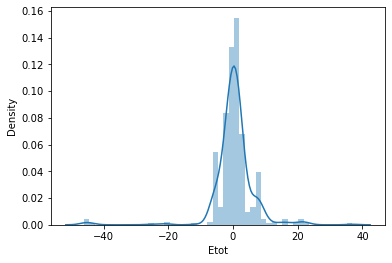

In [40]:
predictions=random_search.predict(X_test1)
sns.distplot(y_test-predictions);

In [41]:
print('MAE:', metrics.mean_absolute_error(y_test1, predictions))
print('MSE:', metrics.mean_squared_error(y_test1, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, predictions)))
print('R_squared:'+ str(round(r2_score(y_test1,predictions),2)))
print('Accuracy',100-(np.mean(np.abs((y_test1-predictions)/y_test1))*100))

MAE: 3.4179020411454863
MSE: 42.91553372983311
RMSE: 6.550994865654613
R_squared:0.53
Accuracy 99.11497688691139


In [42]:
Dt_Mae_3=(round(metrics.mean_absolute_error(y_test1,predictions),2))
Dt_Mse_3=(round(metrics.mean_squared_error(y_test1,predictions),2))
Dt_Rmse_3=(round(round(sqrt(metrics.mean_squared_error(y_test1, predictions)),2)))
Dt_R_squared_3=(round(metrics.r2_score(y_test1,predictions),2))
Dt_acc_3=(100-(np.mean(np.abs((y_test1-predictions)/y_test1))*100))

### Decision Tree algorithm for N=4

In [43]:
Dt_N4=pd.DataFrame(df1.loc[df1['N'] == 4])

In [44]:
Dt_N4

N  infa_C_Au  infa_S_Mg  infa_S_O   cc  cs_Mg  cs_O  ave_GCN  csDist_Mg  \
313  4          4          6         2  2.5      6     4    2.221      2.449   
314  4          4          6         0  2.5      6     2    2.642      2.830   
315  4          4          4         0  2.5      2     0    3.074      3.231   
316  4          0          0         0  2.5      0     0    3.513      3.645   
317  4          0          0         0  2.5      0     0    3.956      4.069   
..  ..        ...        ...       ...  ...    ...   ...      ...        ...   
863  4          4          7         2  2.0      9     4    2.279      2.347   
864  4          4          7         0  2.0      4     2    2.691      2.743   
865  4          4          4         0  2.0      2     0    3.116      3.156   
866  4          0          0         0  2.0      0     0    3.550      3.579   
867  4          0          0         0  2.0      0     0    3.989      4.010   

     csDist_O  Zdist     Etot  
313    -0.556  3.313 -369.490  
314    -0.095  2.583 -376.095  
315     0.367  1.917 -376.960  
316     0.828  0.542 -376.473  
317     1.289  0.542 -375.874  
..        ...    ...      ...  
863    -0.556  4.583 -370.702  
864    -0.095  3.458 -373.327  
865     0.367  1.667 -370.637  
866     0.828  0.333 -376.019  
867     1.289  0.333 -375.346  

[555 rows x 12 columns]

In [45]:
X_N4=Dt_N4.iloc[:,:-1] ## independent features
y_N4=Dt_N4.iloc[:,-1] ## dependent features

In [46]:
X_N4_train, X_N4_test, y_N4_train, y_N4_test = train_test_split(X_N4, y_N4, test_size=0.3, random_state=0)

In [47]:
dtree_N4=DecisionTreeRegressor()

In [48]:
dtree_N4.fit(X_N4_train,y_N4_train)

DecisionTreeRegressor()

In [49]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree_N4.score(X_N4_train, y_N4_train)))

Coefficient of determination R^2 <-- on train set: 0.998108514391892


In [50]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree_N4.score(X_N4_test, y_N4_test)))

Coefficient of determination R^2 <-- on test set: 0.7064525828730093


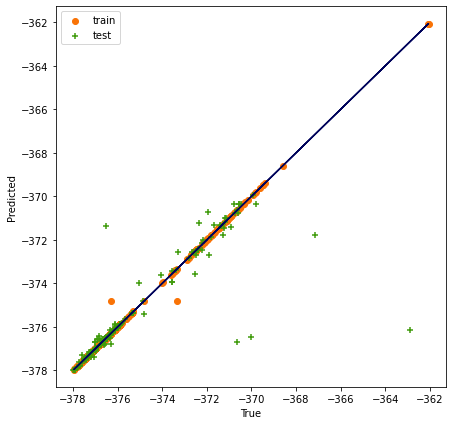

In [51]:
prediction_4test=dtree_N4.predict(X_N4_test)
prediction_4train=dtree_N4.predict(X_N4_train)

plt.figure(figsize=(7,7))
plt.scatter(y_N4_train,prediction_4train, marker='o', color='#f97306', label='train' )
plt.scatter(y_N4_test,prediction_4test, marker='+', color='#3f9b0b', label='test' )
plt.legend(loc='upper left')
plt.plot(y_N4_train,y_N4_train, color='#00035b')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

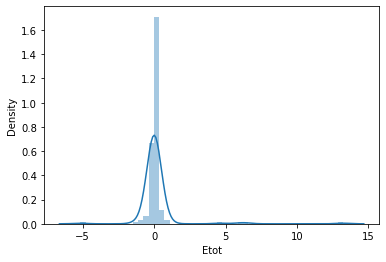

In [52]:

sns.distplot(y_N4_test-prediction_4test);

In [53]:
print('MAE:', str(round(metrics.mean_absolute_error(y_N4_test, prediction_4test),2)))
print('MSE:', str(round(metrics.mean_squared_error(y_N4_test, prediction_4test),2)))
print('RMSE:' + str(round(sqrt(metrics.mean_squared_error(y_N4_test, prediction_4test)),2)))
print('R_squared:'+ str(round(r2_score(y_N4_test,prediction_4test),2)))
print('Accuracy',100-(np.mean(np.abs((y_N4_test-prediction_4test)/y_test))*100))

MAE: 0.34
MSE: 1.86
RMSE:1.36
R_squared:0.71
Accuracy 99.93883544655101


In [54]:
Dt_Mae_N4=(round(metrics.mean_absolute_error(y_N4_test,prediction_4test),2))
Dt_Mse_N4=(round(metrics.mean_squared_error(y_N4_test,prediction_4test),2))
Dt_Rmse_N4=(round(round(sqrt(metrics.mean_squared_error(y_N4_test, prediction_4test)),2)))
Dt_R_squared_N4=(round(metrics.r2_score(y_N4_test,prediction_4test),2))
Dt_acc_N4=(100-(np.mean(np.abs((y_N4_test-prediction_4test)/y_N4_test))*100))

In [55]:
df=pd.DataFrame({'All variables':[Dt_Mse_1,Dt_Rmse_1,Dt_Mae_1,Dt_R_squared_1,Dt_acc_1],
              'Model with selected variables':[Dt_Mse_2,Dt_Rmse_2,Dt_Mae_2,Dt_R_squared_2,Dt_acc_2],
              'Optimised model':[Dt_Mse_3,Dt_Rmse_3,Dt_Mae_3,Dt_R_squared_3,Dt_acc_3],
                'N=4':[Dt_Mse_N4,Dt_Rmse_N4,Dt_Mae_N4,Dt_R_squared_N4,Dt_acc_N4]},
             index=['mean_squared_error','root_mean_squared_error', 'maximum_absolute_error', 'R_squared', 'Accuracy'])
roundTwoDecimals = df.round(decimals=2)
roundTwoDecimals

All variables  Model with selected variables  \
mean_squared_error               14.37                          12.50   
root_mean_squared_error           4.00                           4.00   
maximum_absolute_error            0.81                           0.71   
R_squared                         0.84                           0.86   
Accuracy                         99.79                          99.81   

                         Optimised model    N=4  
mean_squared_error                 42.92   1.86  
root_mean_squared_error             7.00   1.00  
maximum_absolute_error              3.42   0.34  
R_squared                           0.53   0.71  
Accuracy                           99.11  99.91

### Conclusion 

As seen from the above results, performing hyperparameter tunning leads to a worse performing model. 

The decision tree algorithm may be better suited for this problem than a linear model, because it is based on partitioning rather than fitting a best fit line as in a linear model, it is also robust to all the assumptions of linear regression such as linearity, homoscedasticity and normal distribution. 

Using the feature importance built-in function in the sklearn decision tree regressor, we can extract the most important decision makers and refit the model as shown above. This results in a model with lesser variables and identical performance as the model with all predictors, thus saving computational cost, reducing the cost associated with data collection and improving interpretability. 

Finally we try the model for N=4 and we observe a better fit as seen in the residual plot, the model predicts accurately for lower values of Etot which is what we are really interested in.